In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_finance import candlestick_ohlc

import matplotlib.dates as mdates
import datetime as dt
from datetime import date, timedelta
from datetime import timedelta, datetime


import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [2]:
df = pd.read_csv('./data/BTC-USD.csv',sep=',', date_parser=True)
df.drop('Adj Close', inplace = True, axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [3]:
End = '2016-09-15'

In [4]:
End = pd.to_datetime(End)
Start = (End - timedelta(days=365))
df1 = df.loc[Start:End]
df1.index = df1.index.map(mdates.date2num)

In [5]:
Min_pozycja = df1['Low'].argmin()
Max_pozycja = df1['High'].argmax()

In [6]:
if Min_pozycja < Max_pozycja and Max_pozycja < len(df1)-10:
    
    
    #Trend wzrostowy L1
    
    Max_idx = df1.iloc[Max_pozycja].name
    Ax = df1.iloc[Min_pozycja].name
    Ay = df1['Low'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df1.iloc[Min_pozycja].name
    By = df1['Low'].loc[Bx]
    B = [Bx, By]
    
    a1 = (Ay-By)/(Ax-Bx)
    b1 = By - a1 * Bx
    
    df11=df1[A[0]:Max_idx]
    df11['Pozycja na LT'] = df11.index * a1 + b1
    df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
    good = df11['check'][df11['check']>=0].count()
    sum = len(df11['check'])
    
    for i in range(len(df11)):
        df11=df1[B[0]:Max_idx]
        Bx = df11.iloc[0].name
        By = df11['Low'].loc[Bx]
        B = [Bx, By]

        a1 = (Ay-By)/(Ax-Bx)
        b1 = By - a1 * Bx

        df11['Pozycja na LT'] = df11.index * a1 + b1
        df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
        good = df11['check'][df11['check']>=0].count()
        sum = len(df11['check'])

        if good == sum:
            
            print('Pierwszy trend:  Wzrostowy')
            print('Max/Min:  Wcześniej niż 20 dni od końca')
            print('------------------------------------------------------------------------------')
            print('TREND L1')
            print('Znaleziona 2 punkty przez które można przeprowadzić trend L1 wzrostowy')
            print(f'Punkt A:{A}, Punkt C: {C}')
            print('------------------------------------------------------------------------------')
            break
        else:
            df11=df1[B[0]+1:Max_idx]
            Bx = df11.iloc[0].name
            By = df11['Low'].loc[Bx]
            B = [Bx, By]

            a1 = (Ay-By)/(Ax-Bx)
            b1 = By - a1 * Bx
                
            Cx = df1.index.max()+60
            Cy = a1 * Cx + b1
            C = [Cx, Cy]

            X_long = [Ax, Cx]
            Y_long = [Ay, Cy]
    
    
    #--------------------------------------------------------------------
    # Trend spadkowy M1
    df2 = df1.iloc[Max_pozycja:]
    Min_pozycja2 = df2['Low'].argmin()
    Max_idx2 = df2.iloc[Min_pozycja2].name
    
    
    Ax = df2.iloc[0].name
    Ay = df2['High'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df2.iloc[0].name
    By = df2['High'].loc[Bx]
    B = [Bx, By]
    
    a2 = (Ay-By)/(Ax-Bx)
    b2 = By - a2 * Bx
    
    df21 = df2[A[0]:Max_idx2]
    df21['Pozycja na LT'] = df21.index * a2 + b2
    df21['check']= round(df21['High'] - df21['Pozycja na LT'],0)
    good = df21['check'][df21['check']<=0].count()
    sum = len(df21['check'])
    
    for i in range(len(df21)):
        
        df21=df2[B[0]:Max_idx2]
        Bx = df21.iloc[0].name
        By = df21['High'].loc[Bx]
        B = [Bx, By]

        a2 = (Ay-By)/(Ax-Bx)
        b2 = By - a2 * Bx

        df21['Pozycja na LT'] = df21.index * a2 + b2
        df21['check']= round(df21['High'] - df21['Pozycja na LT'],0)
        good = df21['check'][df21['check']<=0].count()
        sum = len(df21['check'])

        if good == sum:
            print('TREND M1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu')
            print(f'Punkt A:{A}, Punkt C: {C}')
            break
            
        else:
            df21=df2[B[0]+1:Max_idx2]
            Bx = df21.iloc[0].name
            By = df21['High'].loc[Bx]
            B = [Bx, By]

            a2 = (Ay-By)/(Ax-Bx)
            b2 = By - a2 * Bx
                
            Cx = df2.index.max() +10
            Cy = a2 * Cx + b2
            C = [Cx, Cy]
            
            if Cy < df1.High.mean()*0.3:
                for i  in range(0,len(df1)):
                    Cx = (df1.index.max()) - i
                    Cy = a2*Cx +b2
                    if Cy>df1.High.mean()*0.3:
                        break
            elif Cy > df1.High.max()*(3/2):
                for i  in range(0,len(df1)):
                    Cx = (df1.index.max()) - i
                    Cy = a2*Cx +b2
                    if Cy < df1.High.max()*(3/2):
                        break

            X_mid1 = [Ax, Cx]
            Y_mid1 = [Ay, Cy]

Pierwszy trend:  Wzrostowy
Max/Min:  Wcześniej niż 20 dni od końca
------------------------------------------------------------------------------
TREND L1
Znaleziona 2 punkty przez które można przeprowadzić trend L1 wzrostowy
Punkt A:[16700.0, 225.117004], Punkt C: [17119.0, 592.0957395983605]
------------------------------------------------------------------------------
TREND M1
Znaleziona 2 punkty przez które można przeprowadzić linie trendu
Punkt A:[16970.0, 777.98999], Punkt C: [17069.0, 495.68213685714]


In [7]:
#Zwiększamy zakres danych nie zmieniając strategii
End = '2016-09-20'

In [8]:
End = pd.to_datetime(End)
dfxx = df.loc[Start:End]
dfxx.index = dfxx.index.map(mdates.date2num)

In [ ]:
dfM1 = dfxx[Max_idx:]
dfM1['TrendLine'] = dfM1.index * a2 + b2

In [10]:
dfM1['Distance(Close-TL)'] = dfM1['TrendLine'] - dfM1['Close']
dfM1['Distance(Open-TL)'] = dfM1['TrendLine'] - dfM1['Open']
dfM1['Distance(High-TL)'] = round(dfM1['TrendLine'],1) - round(dfM1['High'],1)

In [24]:
dfM1[17000.0:].tail(50)

,Open,High,Low,Close,Volume,TrendLine,Distance(Close-TL),Distance(Open-TL),Distance(High-TL)
17015.0,606.396973,612.848022,531.333984,547.465027,330932992.0,649.668239,102.203212,43.271266,36.9
17016.0,548.656006,573.359985,541.546997,566.354980,207982000.0,646.816644,80.461664,98.160638,73.4
17017.0,566.328979,579.495972,565.776978,578.289001,125292000.0,643.965050,65.676049,77.636071,64.5
17018.0,578.281006,578.281006,569.981995,575.043030,66127900.0,641.113455,66.070425,62.832449,62.8
17019.0,575.030029,588.395996,569.468994,587.778015,80797296.0,638.261861,50.483846,63.231832,49.9
17020.0,587.770996,597.513000,586.815979,592.690002,82398400.0,635.410266,42.720264,47.639270,37.9
17021.0,592.736023,592.994019,588.046997,591.054016,61194100.0,632.558672,41.504656,39.822649,39.6
17022.0,591.038025,591.091003,584.793030,587.801025,92228096.0,629.707077,41.906052,38.669052,38.6
17023.0,587.648010,599.984009,586.370972,592.103027,102905000.0,626.855483,34.752456,39.207473,26.9
17024.0,592.124023,597.541992,589.119995,589.119995,74514400.0,624.003888,34.883893,31.879865,26.5


In [11]:
BPClosePositionToCheck = dfM1.index[dfM1['Distance(Close-TL)']<0][0]

In [12]:
BPOpenPositionToCheck = dfM1.index[dfM1['Distance(Open-TL)']<0][0]

In [41]:
#Sprawdzamy czy cena została przerwana w górę czy w dół

In [51]:
BPClosePositionToCheck

17042.0

In [53]:
BPOpenPositionToCheck

17040.0

In [14]:
#Pozycja pierwszego przerwania ceną zamknięcia
BPClosePositionToCheck = dfM1.index[dfM1['Distance(Close-TL)']<0][0]

#Pozycja pierwszego przerwania ceną otwarcia
BPOpenPositionToCheck = dfM1.index[dfM1['Distance(Open-TL)']<0][0]

#--------------------------------------------1----------------------------------------------------------------
#Jeżeli pierwsze lub pierwsze kolejne przecięcie nastąpiło od ceny zamknięcia do ceny otwarcia
if BPOpenPositionToCheck > BPClosePositionToCheck:
    
    
    
    print('klasycznie - Przerwanie trendu M1 spadkowego w górę')
    

#--------------------------------------------2---------------------------------------------------------------    
#Jeżeli pierwsze lub pierwsze kolejne przecięcie nastąpiło od ceny otwarcia do ceny zamknięcia     
elif BPOpenPositionToCheck < BPClosePositionToCheck:
    
    print('Cena otwarcia nad TL, Cena zamknięcia pod TL. Cena nie przecieła wykresu w górę!')
    print('Przerwanie trendu spadkowego w dół')
    
    BPPosition = BPOpenPositionToCheck
    OpenBPPrice = dfM1['Open'].loc[BPPosition]
    CloseBPPrice = dfM1['Close'].loc[BPPosition]
    BPPrice = BPPosition * a2 + b2
    BPCandleHeight = OpenBPPrice - CloseBPPrice
    TunelHeight = BPPrice - CloseBPPrice
    
    #Sprawdzamy, czy przecięcie wydarzyło się w ostatnich 80 dniach
    EndingPoint = dfM1.index[-1]

    if EndingPoint - 80 > BPPosition:
        print('Pierwszy znaleziony Breaking Point dalej niż 80 dni od końcowej daty analizowanego okresu')
        print('-----------------------------------------------------------------------------------------')
        print('Nie rysujemy tuneli')

    else:
        print('Znaleziono przerwnie nie później niż 80 dni od końcowej daty analizowanego okresu')
        print('---------------------------------------------------------------------------------')
        
        if TunelHeight/BPCandleHeight < 1/4:
            
            print('Downline = CloseBPPrice, UpLine = OpenBPPrice')
            
        else:
            print('Downline = CloseBPPrice, UpLine = BPPrice')
            
            #Współrzędne tuneli
            BPPositionEnd = dfM1.index[-1] + 5

            UpLineX = [BPPosition, BPPositionEnd]
            UplineY = [BPPrice, BPPrice]
            DownLineX = [BPPosition, BPPositionEnd]
            DownLineY = [CloseBPPrice, CloseBPPrice]

            print('Przebicie trendu spadkowego M1 w górę')
            print(f'Poziom wsparcia: {CloseBPPrice}')
            print(f'Poziom oporu: {BPPrice}')
            print('---------------------------------------')
            
            #Szukamy przecięć tuelu
            dfM1a = dfxx[BPPosition:]
            dfM1a['DownLine'] = CloseBPPrice
            dfM1a['UpLine'] = BPPrice
            dfM1a['Down-Close'] = dfM1a['Close'] - dfM1a['DownLine']
            dfM1a['UP-Close'] = dfM1a['UpLine'] - dfM1a['Close']
            
            
            #Liczymy przecięcia tuneli tuneli
            DownBreaks = len(dfM1a['Close'][dfM1a['Down-Close'] < 0])
            UpBreaks = len(dfM1a['Close'][dfM1a['UP-Close'] < 0])
            
            
            #Jeżeli tylko przebicie w dół
            if DownBreaks > 0 and UpBreaks == 0:

                BP2Price = dfM1a['Close'][dfM1a['Down-Close'] < 0].iloc[0]
                BP2Position = dfM1a.index[dfM1a['Down-Close']<0][0]
                BP1 = [BPPosition, BPPrice]
                BP2 = [BP2Position, BP2Price]
                BP3 = BP2

                print('Second BP founded')
                print(f'BP2Price: {BP2Price}, BP2Position: {BP2Position}')


                #Sprawdzamy, czy przebicie było większe niż 50% wielkości tunelu
                HeightOfTunel = BPPrice - CloseBPPrice
                HeightOfBreak = CloseBPPrice - BP2Price

                if HeightOfBreak >= 0.5 * HeightOfTunel:

                    print('BP2 breaks Tunel by more than 50% height of tunel')
                    print('Short position recomended')

                #Sprawdzamy, czy 2 świeczka zamyka się poniżej poprzedniej ceny zamknięcia:

                elif dfM1['Close'].loc[BP3Position + 1] < BP2Price and HeightOfBreak >= 0.3 * HeightOfTunel and HeightOfBreak < 0.5 * HeightOfTunel:

                    print('---------------------------------------------------------------------')
                    print('Close price after BP is lower than BP close price and BP2 breaks Tunel by more than 30% height of tunel')

                    print('Long position recomended')



                else:
                    print('No decisice BP yet')

            #----------------------------------------------------------------

            #Jeśeli tylko przebicie w górę
            elif UpBreaks >0 and DownBreaks ==0:

                BP3Price = dfM1a['Close'][dfM1a['UP-Close'] < 0].iloc[0]
                BP3Position = dfM1a.index[dfM1a['UP-Close'] < 0][0]
                BP1 = [BPPosition, BPPrice]
                BP3 = [BP3Position, BP3Price]
                BP2 = BP3

                print('Second BP founded')
                print(f'BP2Price: {BP3Price}, BP2Position: {BP3Position}')

                #Sprawdzamy, czy przebicie było większe niż 50% wielkości tunelu
                HeightOfTunel = BPPrice - CloseBPPrice
                HeightOfBreak = BP3Price - BPPrice

                if HeightOfBreak >= 0.5 * HeightOfTunel:

                    print('------------------------------------------------')
                    print('BP2 breaks Tunel by more than 50% height of tunel')
                    print('Long position recomended')

                #Sprawdzamy, czy 2 świeczka zamyka się powyżej poprzedniej ceny zamknięcia:

                elif dfM1['Close'].loc[BP3Position + 1] > BP3Price and HeightOfBreak >= 0.3 * HeightOfTunel and HeightOfBreak < 0.5 * HeightOfTunel:

                    print('---------------------------------------------------------------------')
                    print('Close price after BP is higher than BP close price and BP2 breaks Tunel by more than 30% height of tunel')

                    print('Long position recomended')

                else:
                    print('No decisice BP yet')

            #------------------------------------------------------------------
            #Jeśli cena przebiła tunel w górę i w dół conajmniej po 1 raz

            elif DownBreaks > 0 and UpBreaks > 0:

                BP1 = [BPPosition, BPPrice]

                BP2Price = dfM1a['Close'][dfM1a['Down-Close'] < 0].iloc[0]
                BP2Position = dfM1a.index[dfM1a['Down-Close']<0][0]

                BP3Price = dfM1a['Close'][dfM1a['UP-Close'] < 0].iloc[0]
                BP3Position = dfM1a.index[dfM1a['UP-Close'] < 0][0]

                #Jeśli BP2 (przebicie w dół) wystąpiło przed BP3 (przebicie w górę)
                if BP2Position < BP3Position:

                    BP2 = [BP2Position, ClosingPrice_BP]
                    BP3 = [BP3Position, BPPrice]

                    print('Long Position recomended')
                    print(f'First Break Point: {BP1}')
                    print(f'Second Break Point: {BP2}')
                    print(f'Third and decisive Break Point: {BP3}')

                #Jeśli BP3 (przebicie w górę) wystąpiło przed BP2 (przebicie w dół)
                elif BP2Position > BP3Position:


                    BP2 = [BP2Position, ClosingPrice_BP]
                    BP3 = [BP3Position, BPPrice]

                    print('Short Position recomended')
                    print(f'First Break Point: {BP1}')
                    print(f'Second Break Point: {BP3}')
                    print(f'Third and decisive Break Point: {BP2}')

        #----------------------------------------------------------------------
            #Jeżeli nie było żadnego przebicia
            else:

                BP1 = [BPPosition, BPPrice]
                BP2 = BP1
                BP3 = BP1

                print('No break point founded. You should wait')
                

#--------------------------------------------3--------------------------------------------------------------- 
#Jeżeli TL przerwany całą świecą dla pierwszego przerwania.
#Dla kolejnego pierwszego przerwania trzeba dodać warunek, że poprzednia świeca pod wykresem
elif BPOpenPositionToCheck == BPClosePositionToCheck:
    print('Przerwanie w górę')
    print('Cała świeca znalazła się nad wykresem (Bez high i low)')
    print('Downline = BP upline = Close lub open w zależności co jest wyżej') 


Cena otwarcia nad TL, Cena zamknięcia pod TL. Cena nie przecieła wykresu w górę!
Przerwanie trendu spadkowego w dół
Znaleziono przerwnie nie później niż 80 dni od końcowej daty analizowanego okresu
---------------------------------------------------------------------------------
Downline = CloseBPPrice, UpLine = BPPrice
Przebicie trendu spadkowego M1 w górę
Poziom wsparcia: 569.947021
Poziom oporu: 578.3783766666602
---------------------------------------
Second BP founded
BP2Price: 598.211975, BP2Position: 17047.0
------------------------------------------------
BP2 breaks Tunel by more than 50% height of tunel
Long position recomended


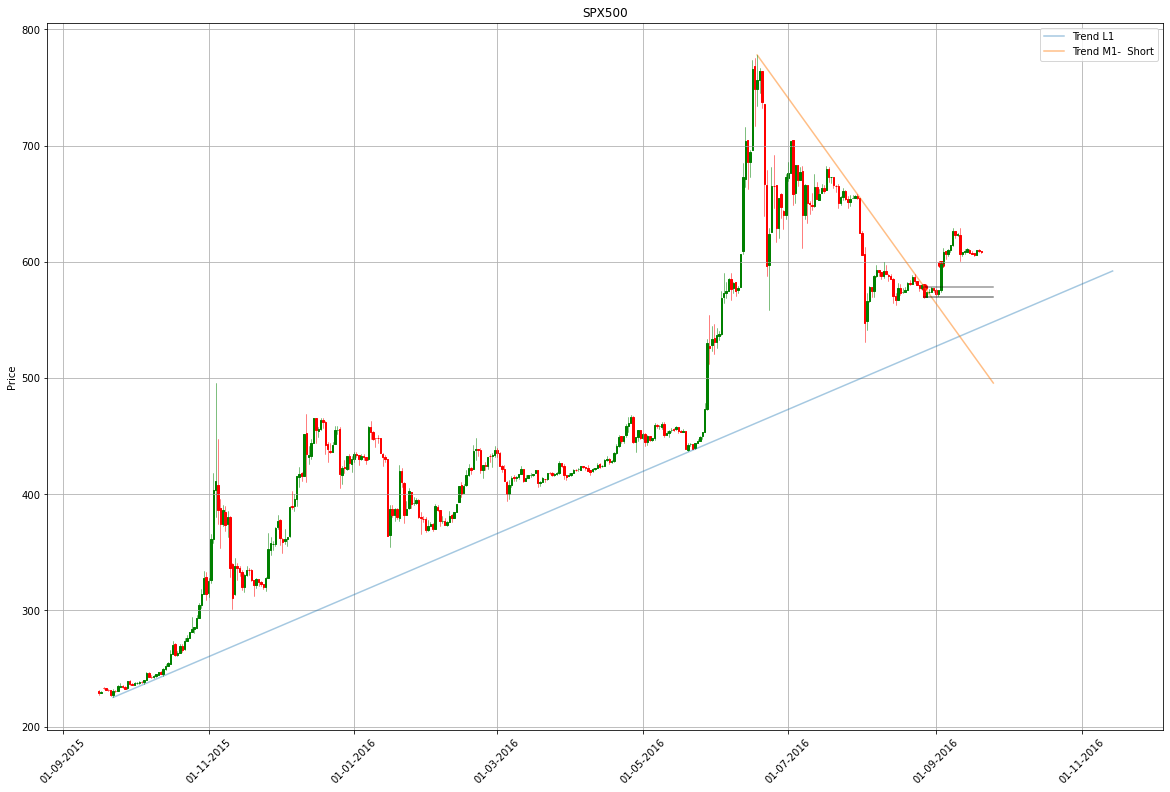

In [15]:
dfxx.reset_index(inplace = True)
dfM1.reset_index(inplace = True)
dfM1a.reset_index(inplace = True)

fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)
ax4 = fig.add_subplot(111)


ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

ax3.plot(UpLineX, UplineY, color='black', alpha = 0.4)
ax3.plot(DownLineX, DownLineY, color='black', alpha = 0.5)

ax4.scatter(BP1[0], BP1[1], alpha=1, color = 'red', edgecolors = 'face' )
ax4.scatter(BP2[0], BP2[1], alpha=1, color = 'red', edgecolors = 'face' )
ax4.scatter(BP3[0], BP3[1], alpha=1, color = 'red', edgecolors = 'face' )

plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, dfxx.values, width=0.6, colorup='g', colordown='r')
plt.show()

In [ ]:
#Pozycja pierwszego przerwania ceną zamknięcia
BPClosePositionToCheck = dfM1.index[dfM1['Distance(Close-TL)']<0][0]

#Pozycja pierwszego przerwania ceną otwarcia
BPOpenPositionToCheck = dfM1.index[dfM1['Distance(Open-TL)']<0][0]

if BPOpenPositionToCheck > BPClosePositionToCheck:

elif BPOpenPositionToCheck < BPClosePositionToCheck:
    
elif BPOpenPositionToCheck == BPClosePositionToCheck: